In [117]:
import json
import loading
import re
import numpy as np
import seaborn as sc
import matplotlib.pyplot as plt
from umap import UMAP

In [3]:
with open("../articles_tmp.json", 'r', encoding='UTF-8') as articles_json:
    article_list = json.load(articles_json)

In [162]:
def get_all_comments(article_list, language):
    comments = []
    rubric = []
    for article in article_list:
        if language in article['content']:
            for comment in article['content'][language]['comments']:
                comments.append({'text': comment,
                                 'category': article['category'][0]})
    return comments

def get_all_articles(article_list, language):
    articles = []
    rubric = []
    for article in article_list:
        if language in article['content']:
            text = " ".join(article['content'][language]['text'])
            articles.append({'text': text,
                             'category': article['category'][0]})
    return articles

def get_all_words(text_list):
    words = set()
    for text in text_list:
        text = re.sub(r"[\.,!?\"\'\-/\(\)´`“”\@\*]", " ", text)
        words.update(set(text.split()))
    return words

def get_access_fn(matrix, mapping):
    return lambda word: matrix[mapping[word.lower()], :] \
                        if word.lower() in mapping  \
                        else np.zeros(matrix.shape[1])

def get_text_embeddings(text_list, access_fn):
    vectors = []
    for text in text_list:
        words = text['text'].split()
        vectors.append(np.mean(np.array([access_fn(x) for x in words]), axis=0))
    return np.array(vectors)

In [188]:
en_comments = get_all_comments(article_list, "English")
en_comments = [x for x in en_comments if x['text'] != ''
              and x['category'] in ('Culture', 'Sport', 'Politics', 'Weather')]

en_words_comments = get_all_words([x['text'] for x in en_comments])

en_matrix_comments, en_mapping_comments = \
loading.load_word_vectors(path_to_embedding="../Embeddings/en_aligned.vec", vocabulary=en_words_comments)


0it [00:00, ?it/s]
456it [00:00, 4559.94it/s]
915it [00:00, 4555.36it/s]
1394it [00:00, 4623.28it/s]
1869it [00:00, 4660.51it/s]
2310it [00:00, 4582.35it/s]
2722it [00:00, 4418.94it/s]
3240it [00:00, 4622.65it/s]
3805it [00:00, 4876.18it/s]
4377it [00:00, 5089.00it/s]
4896it [00:01, 5103.83it/s]
5475it [00:01, 5291.89it/s]
6111it [00:01, 5558.08it/s]
6824it [00:01, 5951.70it/s]
7532it [00:01, 6249.85it/s]
8317it [00:01, 6640.68it/s]
8995it [00:01, 6662.17it/s]
9752it [00:01, 6891.98it/s]
10642it [00:01, 7374.01it/s]
11512it [00:01, 7706.83it/s]
12318it [00:02, 7809.47it/s]
13110it [00:02, 7773.02it/s]
13986it [00:02, 8022.87it/s]
14884it [00:02, 8287.87it/s]
15869it [00:02, 8701.85it/s]
16779it [00:02, 8817.56it/s]
17840it [00:02, 9288.21it/s]
18964it [00:02, 9773.11it/s]
20004it [00:02, 9924.68it/s]
21057it [00:02, 10098.79it/s]
22231it [00:03, 10512.67it/s]
23475it [00:03, 10995.99it/s]
24796it [00:03, 11578.04it/s]
26121it [00:03, 12032.12it/s]
27457it [00:03, 12368.81it/s]
28778it

405318it [00:27, 18466.70it/s]
407167it [00:28, 17884.15it/s]
409056it [00:28, 18174.11it/s]
410927it [00:28, 18278.02it/s]
412873it [00:28, 18564.14it/s]
414734it [00:28, 18249.92it/s]
416675it [00:28, 18529.98it/s]
418617it [00:28, 18788.24it/s]
420546it [00:28, 18935.99it/s]
422443it [00:28, 18833.35it/s]
424329it [00:29, 18400.15it/s]
426173it [00:29, 18140.37it/s]
428140it [00:29, 18573.60it/s]
430003it [00:29, 18370.55it/s]
431907it [00:29, 18512.31it/s]
433831it [00:29, 18724.63it/s]
435772it [00:29, 18870.00it/s]
437662it [00:29, 18545.24it/s]
439631it [00:29, 18820.19it/s]
441566it [00:29, 18974.08it/s]
443522it [00:30, 19092.46it/s]
445456it [00:30, 19164.93it/s]
447408it [00:30, 19214.13it/s]
449336it [00:30, 19176.57it/s]
451255it [00:30, 18841.83it/s]
453141it [00:30, 18679.16it/s]
455017it [00:30, 18647.55it/s]
456883it [00:30, 18540.09it/s]
458738it [00:30, 17795.98it/s]
460525it [00:30, 17004.23it/s]
462238it [00:31, 16940.66it/s]
464099it [00:31, 17360.37it/s]
466073it

864984it [00:56, 13460.57it/s]
866391it [00:56, 13598.42it/s]
867947it [00:56, 14132.63it/s]
869555it [00:56, 14625.46it/s]
871106it [00:56, 14837.68it/s]
872599it [00:56, 14350.74it/s]
874044it [00:56, 13685.84it/s]
875426it [00:56, 13445.42it/s]
876781it [00:56, 12973.24it/s]
878090it [00:57, 12742.24it/s]
879458it [00:57, 13009.69it/s]
880767it [00:57, 12264.43it/s]
882008it [00:57, 11330.20it/s]
883384it [00:57, 11961.61it/s]
884615it [00:57, 12031.47it/s]
886202it [00:57, 12972.78it/s]
887866it [00:57, 13891.13it/s]
889404it [00:57, 14306.27it/s]
891067it [00:58, 14892.38it/s]
892722it [00:58, 15311.24it/s]
894415it [00:58, 15719.47it/s]
896310it [00:58, 16566.63it/s]
898186it [00:58, 17119.56it/s]
900038it [00:58, 17469.81it/s]
901806it [00:58, 17532.12it/s]
903572it [00:58, 16817.70it/s]
905269it [00:58, 16280.66it/s]
906912it [00:58, 15944.94it/s]
908518it [00:59, 15884.18it/s]
910115it [00:59, 15722.03it/s]
911884it [00:59, 16220.19it/s]
913775it [00:59, 16943.03it/s]
915616it

1312654it [01:23, 11247.29it/s]
1313871it [01:23, 11509.06it/s]
1315027it [01:23, 11455.74it/s]
1316246it [01:23, 11666.26it/s]
1317482it [01:23, 11832.35it/s]
1318710it [01:23, 11963.15it/s]
1319909it [01:23, 11759.86it/s]
1321187it [01:23, 12048.31it/s]
1322434it [01:23, 12136.33it/s]
1323651it [01:24, 11827.72it/s]
1324874it [01:24, 11945.49it/s]
1326245it [01:24, 12425.23it/s]
1327497it [01:24, 12416.56it/s]
1328775it [01:24, 12523.05it/s]
1330031it [01:24, 12496.91it/s]
1331284it [01:24, 12286.20it/s]
1332516it [01:24, 12186.85it/s]
1333783it [01:24, 12327.88it/s]
1335018it [01:25, 11975.63it/s]
1336220it [01:25, 11988.82it/s]
1337482it [01:25, 12136.46it/s]
1338760it [01:25, 12287.04it/s]
1340019it [01:25, 12376.30it/s]
1341296it [01:25, 12455.31it/s]
1342543it [01:25, 12312.07it/s]
1343776it [01:25, 11753.90it/s]
1345017it [01:25, 11909.01it/s]
1346213it [01:25, 11748.47it/s]
1347392it [01:26, 11587.44it/s]
1348605it [01:26, 11711.17it/s]
1349799it [01:26, 11778.87it/s]
1351082i

1747968it [01:49, 18273.49it/s]
1749918it [01:49, 18622.46it/s]
1751784it [01:50, 17834.65it/s]
1753578it [01:50, 17448.62it/s]
1755479it [01:50, 17839.11it/s]
1757389it [01:50, 18199.48it/s]
1759224it [01:50, 18190.73it/s]
1761186it [01:50, 18594.56it/s]
1763052it [01:50, 18506.02it/s]
1764907it [01:50, 18461.15it/s]
1766762it [01:50, 18435.17it/s]
1768674it [01:50, 18581.30it/s]
1770534it [01:51, 18312.22it/s]
1772368it [01:51, 17997.05it/s]
1774223it [01:51, 18159.15it/s]
1776125it [01:51, 18356.16it/s]
1778005it [01:51, 18486.90it/s]
1779856it [01:51, 18383.77it/s]
1781696it [01:51, 16642.28it/s]
1783393it [01:51, 16165.29it/s]
1785129it [01:51, 16505.71it/s]
1786800it [01:52, 16134.82it/s]
1788531it [01:52, 16423.39it/s]
1790186it [01:52, 16411.93it/s]
1791987it [01:52, 16813.93it/s]
1793858it [01:52, 17340.71it/s]
1795637it [01:52, 17422.13it/s]
1797488it [01:52, 17734.67it/s]
1799268it [01:52, 17339.27it/s]
1801022it [01:52, 17398.60it/s]
1802946it [01:52, 17861.09it/s]
1804739i

2166196it [02:16, 15176.13it/s]
2168066it [02:16, 16044.20it/s]
2169712it [02:16, 15931.80it/s]
2171484it [02:16, 16383.59it/s]
2173324it [02:16, 16893.92it/s]
2175083it [02:17, 17096.78it/s]
2176886it [02:17, 17366.25it/s]
2178781it [02:17, 17810.67it/s]
2180573it [02:17, 17684.24it/s]
2182350it [02:17, 16808.39it/s]
2184046it [02:17, 16702.04it/s]
2185898it [02:17, 17208.49it/s]
2187652it [02:17, 17257.50it/s]
2189386it [02:17, 17280.53it/s]
2191120it [02:18, 16700.53it/s]
2192905it [02:18, 17027.48it/s]
2194678it [02:18, 17184.57it/s]
2196495it [02:18, 17418.53it/s]
2198317it [02:18, 17651.12it/s]
2200087it [02:18, 17102.56it/s]
2201804it [02:18, 16771.69it/s]
2203554it [02:18, 16934.40it/s]
2205380it [02:18, 17311.37it/s]
2207147it [02:18, 17366.23it/s]
2208888it [02:19, 16584.44it/s]
2210564it [02:19, 16587.45it/s]
2212230it [02:19, 15410.74it/s]
2213813it [02:19, 15533.88it/s]
2215505it [02:19, 15880.55it/s]
2217339it [02:19, 16544.52it/s]
2219060it [02:19, 16691.86it/s]
2220876i

In [190]:
get_en_vector_comments = get_access_fn(en_matrix_comments, en_mapping_comments)
comment_vectors = get_text_embeddings(en_comments, get_en_vector_comments)

In [191]:
transformation = UMAP(n_components=2, n_neighbors=5)
en_2d = transformation.fit_transform(np.array(comment_vectors))

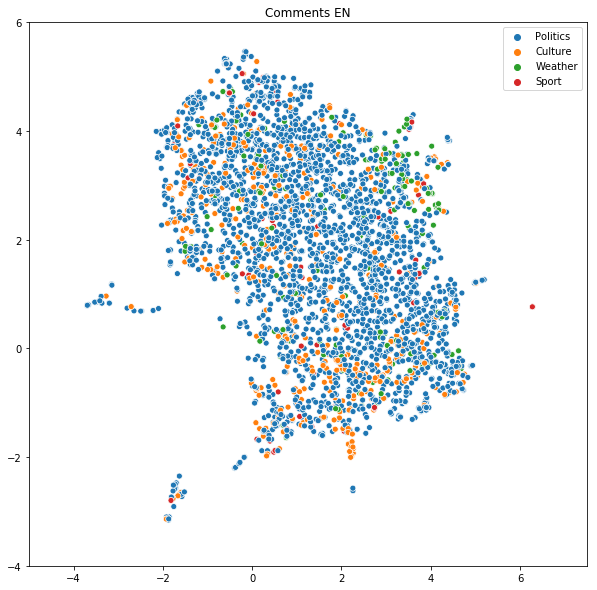

In [222]:
plt.figure(figsize=(10,10))
sc.scatterplot(en_2d[:, 0], en_2d[:, 1], hue=[x['category'] for x in en_comments]).set_title("Comments EN")

plt.xlim(-5,7.5)
plt.ylim(-4,6)

plt.savefig("EN_comments.png")

In [177]:
en_articles = get_all_articles(article_list, "English")
en_articles = [x for x in en_articles if x['text'] != ''\
               and x['category'] in ('Culture', 'Sport', 'Politics', 'Weather')]

en_words = get_all_words([x['text'] for x in en_articles])

en_matrix, en_mapping = \
loading.load_word_vectors(path_to_embedding="../Embeddings/en_aligned.vec", vocabulary=en_words)


0it [00:00, ?it/s]
459it [00:00, 4544.78it/s]
914it [00:00, 4546.33it/s]
1359it [00:00, 4516.98it/s]
1802it [00:00, 4476.92it/s]
2272it [00:00, 4541.59it/s]
2776it [00:00, 4667.44it/s]
3248it [00:00, 4669.18it/s]
3711it [00:00, 4657.23it/s]
4193it [00:00, 4691.20it/s]
4707it [00:01, 4803.91it/s]
5256it [00:01, 4977.51it/s]
5766it [00:01, 5013.58it/s]
6345it [00:01, 5209.69it/s]
6893it [00:01, 5272.68it/s]
7465it [00:01, 5399.27it/s]
8105it [00:01, 5650.12it/s]
8731it [00:01, 5820.20it/s]
9337it [00:01, 5872.93it/s]
9990it [00:01, 6055.71it/s]
10641it [00:02, 6167.69it/s]
11293it [00:02, 6251.30it/s]
11954it [00:02, 6336.47it/s]
12646it [00:02, 6482.54it/s]
13391it [00:02, 6727.17it/s]
14217it [00:02, 7105.40it/s]
14959it [00:02, 7196.88it/s]
15771it [00:02, 7430.62it/s]
16642it [00:02, 7773.04it/s]
17550it [00:02, 8102.22it/s]
18530it [00:03, 8546.34it/s]
19398it [00:03, 8560.44it/s]
20292it [00:03, 8645.77it/s]
21231it [00:03, 8831.48it/s]
22208it [00:03, 9093.33it/s]
23225it [00:03,

389912it [00:27, 11555.10it/s]
391073it [00:27, 11571.46it/s]
392291it [00:28, 11747.53it/s]
393469it [00:28, 11583.83it/s]
394793it [00:28, 12002.78it/s]
396013it [00:28, 12025.57it/s]
397263it [00:28, 12128.76it/s]
398479it [00:28, 12065.85it/s]
399954it [00:28, 12762.52it/s]
401375it [00:28, 13164.82it/s]
403056it [00:28, 14045.62it/s]
404987it [00:28, 15296.52it/s]
406916it [00:29, 16309.36it/s]
408793it [00:29, 16975.33it/s]
410715it [00:29, 17545.17it/s]
412506it [00:29, 16951.67it/s]
414469it [00:29, 17627.62it/s]
416260it [00:29, 17711.34it/s]
418254it [00:29, 18325.66it/s]
420106it [00:29, 18220.94it/s]
422067it [00:29, 18616.28it/s]
423947it [00:29, 18667.94it/s]
425822it [00:30, 18150.51it/s]
427740it [00:30, 18396.85it/s]
429661it [00:30, 18633.47it/s]
431530it [00:30, 18484.31it/s]
433383it [00:30, 18388.00it/s]
435225it [00:30, 18394.80it/s]
437067it [00:30, 18294.96it/s]
438899it [00:30, 17979.30it/s]
440810it [00:30, 18251.92it/s]
442809it [00:31, 18688.32it/s]
444683it

860090it [00:55, 17367.28it/s]
861832it [00:55, 17230.63it/s]
863559it [00:55, 17038.10it/s]
865271it [00:55, 17062.35it/s]
866980it [00:56, 16868.86it/s]
868749it [00:56, 17106.73it/s]
870594it [00:56, 17488.66it/s]
872347it [00:56, 17091.94it/s]
874061it [00:56, 16512.80it/s]
875720it [00:56, 16196.97it/s]
877347it [00:56, 14295.22it/s]
878822it [00:56, 13154.71it/s]
880188it [00:56, 12924.60it/s]
881572it [00:57, 13148.73it/s]
883275it [00:57, 14078.80it/s]
884776it [00:57, 14345.30it/s]
886563it [00:57, 15209.04it/s]
888424it [00:57, 16091.02it/s]
890310it [00:57, 16787.68it/s]
892023it [00:57, 16839.02it/s]
893731it [00:57, 16614.26it/s]
895656it [00:57, 17279.11it/s]
897403it [00:57, 17233.27it/s]
899143it [00:58, 17232.05it/s]
900876it [00:58, 17158.39it/s]
902739it [00:58, 17573.37it/s]
904583it [00:58, 17772.94it/s]
906525it [00:58, 18185.38it/s]
908457it [00:58, 18461.17it/s]
910348it [00:58, 18538.94it/s]
912206it [00:58, 18170.07it/s]
914041it [00:58, 18223.00it/s]
915908it

1330877it [01:22, 17318.77it/s]
1332762it [01:22, 17748.62it/s]
1334567it [01:22, 17787.48it/s]
1336444it [01:22, 18069.47it/s]
1338259it [01:22, 17829.24it/s]
1340180it [01:22, 18221.67it/s]
1342009it [01:23, 18080.06it/s]
1343900it [01:23, 18268.27it/s]
1345806it [01:23, 18444.46it/s]
1347663it [01:23, 18480.15it/s]
1349514it [01:23, 18379.15it/s]
1351400it [01:23, 18465.62it/s]
1353357it [01:23, 18732.53it/s]
1355233it [01:23, 18684.74it/s]
1357103it [01:23, 18359.57it/s]
1358986it [01:23, 18497.80it/s]
1360838it [01:24, 17507.52it/s]
1362601it [01:24, 16792.26it/s]
1364367it [01:24, 17043.08it/s]
1366083it [01:24, 17027.55it/s]
1367940it [01:24, 17462.64it/s]
1369764it [01:24, 17688.49it/s]
1371540it [01:24, 17397.95it/s]
1373310it [01:24, 17485.05it/s]
1375167it [01:24, 17748.02it/s]
1376999it [01:24, 17863.84it/s]
1378858it [01:25, 18072.93it/s]
1380815it [01:25, 18447.19it/s]
1382664it [01:25, 17921.43it/s]
1384572it [01:25, 18253.77it/s]
1386403it [01:25, 18056.65it/s]
1388340i

1786902it [01:49, 13392.48it/s]
1788269it [01:49, 13163.26it/s]
1789606it [01:49, 13107.95it/s]
1790987it [01:49, 13272.61it/s]
1792588it [01:49, 13989.92it/s]
1794442it [01:49, 15101.78it/s]
1796287it [01:49, 15971.26it/s]
1798087it [01:50, 16485.20it/s]
1799966it [01:50, 17114.54it/s]
1801849it [01:50, 17546.46it/s]
1803724it [01:50, 17840.33it/s]
1805526it [01:50, 17785.19it/s]
1807383it [01:50, 17963.55it/s]
1809189it [01:50, 17883.20it/s]
1810984it [01:50, 16988.65it/s]
1812850it [01:50, 17410.49it/s]
1814798it [01:50, 17934.42it/s]
1816604it [01:51, 17811.83it/s]
1818395it [01:51, 17475.99it/s]
1820151it [01:51, 17243.01it/s]
1821909it [01:51, 17342.62it/s]
1823761it [01:51, 17629.54it/s]
1825536it [01:51, 17613.03it/s]
1827324it [01:51, 17639.88it/s]
1829125it [01:51, 17746.94it/s]
1831043it [01:51, 18101.64it/s]
1832857it [01:52, 17744.00it/s]
1834678it [01:52, 17829.12it/s]
1836594it [01:52, 18156.77it/s]
1838413it [01:52, 17951.40it/s]
1840229it [01:52, 17960.20it/s]
1842028i

2255162it [02:15, 16869.35it/s]
2256852it [02:15, 16531.45it/s]
2258522it [02:15, 16532.51it/s]
2260350it [02:15, 17020.63it/s]
2262163it [02:16, 17287.17it/s]
2263910it [02:16, 17292.85it/s]
2265699it [02:16, 17467.59it/s]
2267578it [02:16, 17844.30it/s]
2269420it [02:16, 18012.90it/s]
2271295it [02:16, 18225.46it/s]
2273190it [02:16, 18385.74it/s]
2275031it [02:16, 17805.94it/s]
2276867it [02:16, 17966.91it/s]
2278746it [02:16, 18205.59it/s]
2280571it [02:17, 18166.61it/s]
2282465it [02:17, 18339.14it/s]
2284329it [02:17, 18427.91it/s]
2286174it [02:17, 18431.35it/s]
2288019it [02:17, 18114.00it/s]
2289833it [02:17, 17145.40it/s]
2291560it [02:17, 16399.96it/s]
2293332it [02:17, 16774.62it/s]
2295207it [02:17, 17272.29it/s]
2296973it [02:18, 17337.97it/s]
2298783it [02:18, 17557.88it/s]
2300684it [02:18, 17920.82it/s]
2302570it [02:18, 18192.12it/s]
2304458it [02:18, 18339.63it/s]
2306297it [02:18, 18191.49it/s]
2308160it [02:18, 18320.52it/s]
2309995it [02:18, 17693.25it/s]
2311864i

In [178]:
get_en_vector = get_access_fn(en_matrix, en_mapping)
article_vectors = get_text_embeddings(en_articles, get_en_vector)

In [196]:
transformation = UMAP(n_components=2, n_neighbors=50)
en_2d_articles = transformation.fit_transform(np.array(article_vectors))

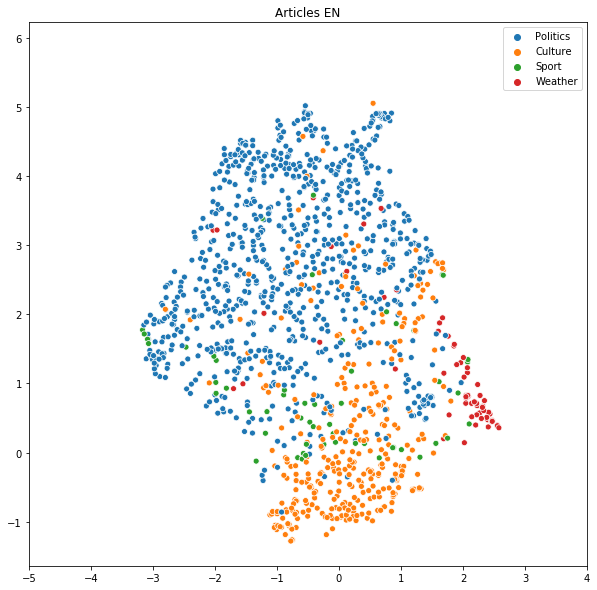

In [221]:
plt.figure(figsize=(10,10))
sc.scatterplot(en_2d_articles[:, 0], en_2d_articles[:, 1], hue=[x['category'] for x in en_articles]).set_title("Articles EN")
plt.xlim(-5,4)
#plt.ylim(2,10)
plt.savefig("EN_articles.png")

In [206]:
def load_word_vectors(article_list, loading_fn, language, embedding):

    entries = loading_fn(article_list, language)
    entries = [x for x in entries if x['text'] != ''
                  and x['category'] in ('Culture', 'Sport', 'Politics', 'Weather')]

    words = get_all_words([x['text'] for x in entries])

    matrix, mapping = \
    loading.load_word_vectors(path_to_embedding=embedding, \
                              vocabulary=words)
    
    get_vector = get_access_fn(matrix, mapping)
    article_vectors = get_text_embeddings(entries, get_vector)
    
    return entries, article_vectors

In [207]:
de_comments, de_comment_matrix = \
load_word_vectors(article_list, get_all_comments, "German", "../Embeddings/de_aligned.vec")



0it [00:00, ?it/s]

657it [00:00, 6504.76it/s]

1525it [00:00, 7033.46it/s]

2583it [00:00, 7819.18it/s]

3831it [00:00, 8787.87it/s]

5117it [00:00, 9688.42it/s]

6453it [00:00, 10534.07it/s]

7954it [00:00, 11541.29it/s]

9379it [00:00, 12208.96it/s]

10754it [00:00, 12633.71it/s]

12260it [00:01, 13240.47it/s]

13911it [00:01, 14040.93it/s]

15498it [00:01, 14504.11it/s]

16974it [00:01, 14491.83it/s]

18713it [00:01, 15216.12it/s]

20489it [00:01, 15856.79it/s]

22166it [00:01, 16074.07it/s]

23870it [00:01, 16350.02it/s]

25562it [00:01, 16516.75it/s]

27357it [00:01, 16876.77it/s]

29267it [00:02, 17485.01it/s]

31177it [00:02, 17892.07it/s]

33039it [00:02, 18051.74it/s]

34907it [00:02, 18235.35it/s]

36737it [00:02, 17079.59it/s]

38464it [00:02, 16735.30it/s]

40153it [00:02, 16019.44it/s]

41972it [00:02, 16569.01it/s]

43753it [00:02, 16922.53it/s]

45565it [00:02, 17264.47it/s]

47384it [00:03, 17481.93it/s]

49141it [00:03, 17199.43it/s]

50868it [00:03, 16623.97it/s]



454672it [00:26, 12549.53it/s]

455951it [00:26, 12509.81it/s]

457251it [00:27, 12652.88it/s]

458740it [00:27, 13214.82it/s]

460077it [00:27, 13104.92it/s]

461399it [00:27, 12796.01it/s]

462688it [00:27, 12525.02it/s]

463949it [00:27, 12365.70it/s]

465730it [00:27, 13614.11it/s]

467582it [00:27, 14754.23it/s]

469294it [00:27, 15390.37it/s]

471156it [00:28, 16194.94it/s]

473011it [00:28, 16836.10it/s]

474807it [00:28, 17158.21it/s]

476763it [00:28, 17814.11it/s]

478571it [00:28, 17580.06it/s]

480436it [00:28, 17885.43it/s]

482268it [00:28, 17963.04it/s]

484148it [00:28, 18206.00it/s]

485982it [00:28, 18244.13it/s]

487812it [00:28, 18154.04it/s]

489632it [00:29, 17847.75it/s]

491513it [00:29, 18073.62it/s]

493324it [00:29, 17660.76it/s]

495184it [00:29, 17932.40it/s]

497053it [00:29, 18151.33it/s]

498924it [00:29, 18264.12it/s]

500816it [00:29, 18399.89it/s]

502670it [00:29, 18388.90it/s]

504511it [00:29, 16924.25it/s]

506338it [00:29, 17306.66it/s]

508088it

903910it [00:53, 18264.40it/s]

905739it [00:53, 18111.14it/s]

907582it [00:53, 18152.00it/s]

909432it [00:54, 18201.26it/s]

911253it [00:54, 17829.42it/s]

913039it [00:54, 17573.33it/s]

914971it [00:54, 18014.93it/s]

916907it [00:54, 18346.32it/s]

918747it [00:54, 17932.51it/s]

920663it [00:54, 18231.97it/s]

922492it [00:54, 18086.28it/s]

924305it [00:54, 17885.20it/s]

926113it [00:54, 17941.02it/s]

927910it [00:55, 17532.13it/s]

929667it [00:55, 17233.41it/s]

931395it [00:55, 17093.76it/s]

933134it [00:55, 17179.39it/s]

935029it [00:55, 17625.76it/s]

936796it [00:55, 17078.66it/s]

938673it [00:55, 17501.72it/s]

940609it [00:55, 17972.49it/s]

942415it [00:55, 17679.81it/s]

944190it [00:56, 17441.55it/s]

945984it [00:56, 17536.95it/s]

947742it [00:56, 16989.99it/s]

949627it [00:56, 17507.80it/s]

951510it [00:56, 17882.57it/s]

953307it [00:56, 17647.80it/s]

955213it [00:56, 18048.76it/s]

957025it [00:56, 18015.49it/s]

958929it [00:56, 18258.91it/s]

960759it

1344229it [01:19, 17514.91it/s]

1345986it [01:19, 16974.82it/s]

1347691it [01:19, 16600.32it/s]

1349643it [01:19, 17333.91it/s]

1351549it [01:20, 17768.24it/s]

1353489it [01:20, 18228.12it/s]

1355324it [01:20, 18156.20it/s]

1357204it [01:20, 18291.18it/s]

1359039it [01:20, 18197.09it/s]

1360863it [01:20, 17734.04it/s]

1362642it [01:20, 16985.86it/s]

1364363it [01:20, 17004.24it/s]

1366310it [01:20, 17628.04it/s]

1368141it [01:20, 17775.57it/s]

1370058it [01:21, 18172.11it/s]

1371883it [01:21, 17874.51it/s]

1373732it [01:21, 18002.26it/s]

1375538it [01:21, 17753.27it/s]

1377365it [01:21, 17853.15it/s]

1379154it [01:21, 17496.98it/s]

1380908it [01:21, 17200.91it/s]

1382816it [01:21, 17724.14it/s]

1384686it [01:21, 17954.50it/s]

1386593it [01:22, 18272.74it/s]

1388426it [01:22, 17864.89it/s]

1390241it [01:22, 17949.03it/s]

1392141it [01:22, 18199.64it/s]

1393965it [01:22, 17837.80it/s]

1395843it [01:22, 18110.12it/s]

1397658it [01:22, 17595.46it/s]

1399424it 

1784684it [01:45, 18494.84it/s]

1786536it [01:45, 18444.84it/s]

1788382it [01:45, 18393.77it/s]

1790301it [01:45, 18574.56it/s]

1792160it [01:45, 18413.38it/s]

1794016it [01:45, 18454.73it/s]

1795863it [01:46, 18459.13it/s]

1797811it [01:46, 18701.80it/s]

1799683it [01:46, 18539.85it/s]

1801575it [01:46, 18598.45it/s]

1803436it [01:46, 18546.71it/s]

1805292it [01:46, 18384.80it/s]

1807159it [01:46, 18469.44it/s]

1809007it [01:46, 17728.73it/s]

1810787it [01:46, 16561.16it/s]

1812464it [01:47, 16623.01it/s]

1814315it [01:47, 17145.25it/s]

1816044it [01:47, 16838.75it/s]

1817894it [01:47, 17257.04it/s]

1819735it [01:47, 17537.33it/s]

1821498it [01:47, 17005.50it/s]

1823208it [01:47, 16210.58it/s]

1825065it [01:47, 16852.62it/s]

1826878it [01:47, 17167.84it/s]

1828737it [01:47, 17568.90it/s]

1830675it [01:48, 18027.68it/s]

1832517it [01:48, 18142.94it/s]

1834340it [01:48, 18061.40it/s]

1836152it [01:48, 17918.17it/s]

1837984it [01:48, 18036.37it/s]

1839848it 

2237891it [02:10, 16678.61it/s]

2239578it [02:11, 16735.19it/s]

2241385it [02:11, 17065.94it/s]

2243125it [02:11, 17111.91it/s]

2244906it [02:11, 17267.88it/s]

2246746it [02:11, 17592.19it/s]

2248509it [02:11, 17344.11it/s]

2250267it [02:11, 17414.20it/s]

2252106it [02:11, 17695.64it/s]

2253879it [02:11, 17496.58it/s]

2255688it [02:11, 17670.39it/s]

2257600it [02:12, 18030.48it/s]

2259481it [02:12, 18257.46it/s]

2261310it [02:12, 17891.95it/s]

2263103it [02:12, 17332.32it/s]

2264843it [02:12, 16606.82it/s]

2266521it [02:12, 16609.35it/s]

2268271it [02:12, 16866.85it/s]

2269965it [02:12, 16445.46it/s]

2271617it [02:12, 15806.54it/s]

2273213it [02:13, 15805.12it/s]

2274953it [02:13, 16249.92it/s]

2275233it [02:13, 17090.17it/s]

In [219]:
transformation = UMAP(n_components=2, n_neighbors=50)
de_2d_comment = transformation.fit_transform(de_comment_matrix)

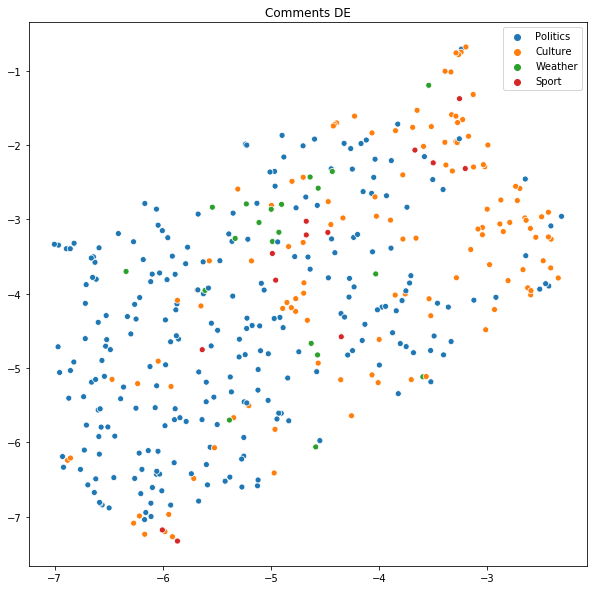

In [220]:
plt.figure(figsize=(10,10))
sc.scatterplot(de_2d_comment[:, 0], \
               de_2d_comment[:, 1], \
               hue=[x['category'] for x in de_comments]).set_title("Comments DE")
#plt.xlim(-5,4)
#plt.ylim(2,10)
plt.savefig("DE_comments.png")

In [215]:
de_articles, de_article_matrix = \
load_word_vectors(article_list, get_all_articles, "German", "../Embeddings/de_aligned.vec")



0it [00:00, ?it/s]

587it [00:00, 5812.25it/s]

1212it [00:00, 5936.99it/s]

1958it [00:00, 6324.25it/s]

2768it [00:00, 6768.84it/s]

3398it [00:00, 6601.15it/s]

4251it [00:00, 7080.68it/s]

5113it [00:00, 7462.95it/s]

5995it [00:00, 7823.32it/s]

6872it [00:00, 8084.91it/s]

7872it [00:01, 8556.62it/s]

8855it [00:01, 8901.77it/s]

9900it [00:01, 9290.87it/s]

10993it [00:01, 9702.60it/s]

12085it [00:01, 10012.08it/s]

13096it [00:01, 10041.22it/s]

14219it [00:01, 10370.51it/s]

15478it [00:01, 10948.21it/s]

16669it [00:01, 11188.53it/s]

18061it [00:01, 11859.33it/s]

19268it [00:02, 11921.52it/s]

20557it [00:02, 12162.20it/s]

21888it [00:02, 12485.12it/s]

23233it [00:02, 12759.71it/s]

24629it [00:02, 13097.54it/s]

25947it [00:02, 12889.62it/s]

27306it [00:02, 13055.97it/s]

28646it [00:02, 13118.72it/s]

30137it [00:02, 13572.07it/s]

31501it [00:02, 13313.61it/s]

32838it [00:03, 12905.90it/s]

34373it [00:03, 13517.51it/s]

35917it [00:03, 14040.18it/s]

37462it [00:

457085it [00:26, 18933.20it/s]

459031it [00:26, 19085.33it/s]

460941it [00:26, 18697.79it/s]

462858it [00:26, 18784.07it/s]

464810it [00:26, 18943.99it/s]

466741it [00:27, 18996.22it/s]

468642it [00:27, 18943.69it/s]

470604it [00:27, 19140.92it/s]

472545it [00:27, 19218.88it/s]

474490it [00:27, 19232.80it/s]

476414it [00:27, 18950.36it/s]

478375it [00:27, 19084.81it/s]

480344it [00:27, 19206.95it/s]

482362it [00:27, 19488.16it/s]

484349it [00:27, 19546.68it/s]

486325it [00:28, 19607.24it/s]

488296it [00:28, 19579.79it/s]

490255it [00:28, 19410.76it/s]

492205it [00:28, 19436.82it/s]

494150it [00:28, 18551.37it/s]

496050it [00:28, 18683.64it/s]

497982it [00:28, 18867.63it/s]

499920it [00:28, 19018.31it/s]

501882it [00:28, 19140.86it/s]

503864it [00:28, 19281.59it/s]

505836it [00:29, 19355.64it/s]

507774it [00:29, 19131.24it/s]

509689it [00:29, 19079.97it/s]

511599it [00:29, 18974.76it/s]

513498it [00:29, 18807.34it/s]

515402it [00:29, 18823.29it/s]

517289it

936954it [00:53, 17580.30it/s]

938838it [00:53, 17890.55it/s]

940740it [00:53, 18163.17it/s]

942564it [00:53, 17257.26it/s]

944305it [00:53, 16514.92it/s]

945974it [00:53, 16566.59it/s]

947826it [00:53, 17061.16it/s]

949769it [00:53, 17708.78it/s]

951601it [00:53, 17835.59it/s]

953440it [00:54, 17998.30it/s]

955338it [00:54, 18281.77it/s]

957173it [00:54, 18139.56it/s]

959037it [00:54, 18286.70it/s]

960870it [00:54, 18083.35it/s]

962716it [00:54, 18140.88it/s]

964546it [00:54, 18186.28it/s]

966411it [00:54, 18270.90it/s]

968290it [00:54, 18369.58it/s]

970128it [00:54, 18370.46it/s]

971989it [00:55, 18389.61it/s]

973840it [00:55, 18370.72it/s]

975722it [00:55, 18500.93it/s]

977662it [00:55, 18761.62it/s]

979540it [00:55, 18329.77it/s]

981377it [00:55, 18071.08it/s]

983321it [00:55, 18408.81it/s]

985232it [00:55, 18613.50it/s]

987180it [00:55, 18863.78it/s]

989165it [00:55, 19095.53it/s]

991081it [00:56, 19058.04it/s]

993018it [00:56, 19146.92it/s]

994935it

1392251it [01:18, 18343.20it/s]

1394108it [01:19, 18408.31it/s]

1395981it [01:19, 18450.91it/s]

1397896it [01:19, 18600.99it/s]

1399843it [01:19, 18799.09it/s]

1401724it [01:19, 18746.17it/s]

1403611it [01:19, 18783.04it/s]

1405525it [01:19, 18888.72it/s]

1407492it [01:19, 19060.66it/s]

1409439it [01:19, 19181.30it/s]

1411358it [01:19, 19181.87it/s]

1413277it [01:20, 19072.57it/s]

1415185it [01:20, 19074.07it/s]

1417093it [01:20, 18962.91it/s]

1418990it [01:20, 18962.23it/s]

1420887it [01:20, 18684.47it/s]

1422760it [01:20, 18644.80it/s]

1424644it [01:20, 18700.45it/s]

1426515it [01:20, 18538.88it/s]

1428390it [01:20, 18599.08it/s]

1430300it [01:20, 18691.04it/s]

1432170it [01:21, 18584.23it/s]

1434041it [01:21, 18567.22it/s]

1435923it [01:21, 18259.78it/s]

1437836it [01:21, 18459.37it/s]

1439684it [01:21, 18195.13it/s]

1441521it [01:21, 18139.65it/s]

1443440it [01:21, 18442.46it/s]

1445377it [01:21, 18711.22it/s]

1447285it [01:21, 18820.33it/s]

1449169it 

1858658it [01:44, 18201.32it/s]

1860575it [01:44, 18428.04it/s]

1862473it [01:44, 18536.14it/s]

1864353it [01:44, 18613.94it/s]

1866277it [01:44, 18797.42it/s]

1868187it [01:44, 18831.90it/s]

1870116it [01:44, 18911.25it/s]

1872062it [01:44, 19069.78it/s]

1873971it [01:45, 19018.69it/s]

1875922it [01:45, 19110.09it/s]

1877912it [01:45, 19340.23it/s]

1879848it [01:45, 18460.96it/s]

1881704it [01:45, 18432.82it/s]

1883604it [01:45, 18544.56it/s]

1885512it [01:45, 18649.95it/s]

1887506it [01:45, 18964.79it/s]

1889461it [01:45, 19080.78it/s]

1891427it [01:46, 19250.90it/s]

1893355it [01:46, 19087.85it/s]

1895292it [01:46, 19168.40it/s]

1897230it [01:46, 19174.85it/s]

1899149it [01:46, 18898.49it/s]

1901041it [01:46, 18789.82it/s]

1902922it [01:46, 18686.11it/s]

1904792it [01:46, 18579.45it/s]

1906658it [01:46, 18603.34it/s]

1908603it [01:46, 18795.07it/s]

1910522it [01:47, 18911.70it/s]

1912414it [01:47, 18911.72it/s]

1914306it [01:47, 18692.22it/s]

1916199it 

In [216]:
transformation = UMAP(n_components=2, n_neighbors=50)
de_2d_article = transformation.fit_transform(de_article_matrix)

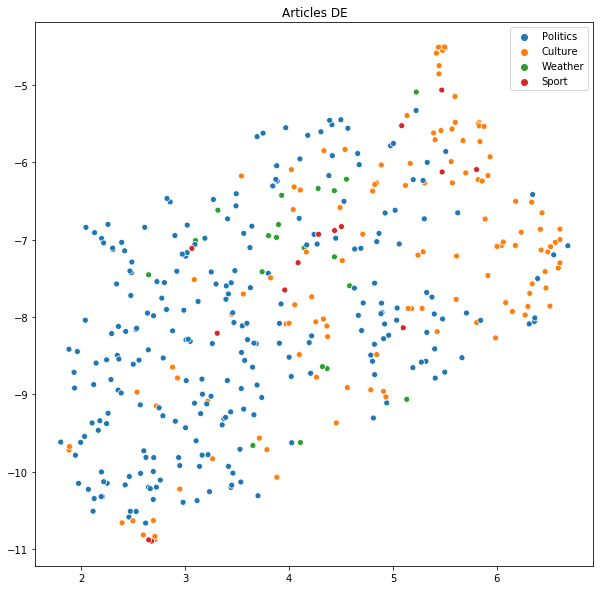

In [217]:
plt.figure(figsize=(10,10))
sc.scatterplot(de_2d_article[:, 0], \
               de_2d_article[:, 1], \
               hue=[x['category'] for x in de_articles]).set_title("Articles DE")
#plt.xlim(-5,4)
#plt.ylim(2,10)
plt.savefig("DE_articles.png")

In [214]:
de_article_matrix

NameError: name 'de_article_matrix' is not defined